In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
value = pd.read_csv('train_set_values.csv')
value.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [21]:
loc_data = value[value.longitude == 0]
loc_data.reset_index(inplace=True)
loc_data

,index,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
1,53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
2,168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
4,253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1808,59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1809,59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1810,59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [22]:
from geopy.geocoders import Nominatim

In [23]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Magu, Tanzania')

In [24]:
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = -2.5899613, Longitude = 33.4445308


In [25]:
lat = loc_data['latitude']
long = loc_data['longitude']
location = loc_data['lga']
df_loc = pd.DataFrame({
    'lat': lat,
    'long': long,
    'lga': location
})

df_loc

,lat,long,lga
0,-2.000000e-08,0.0,Bariadi
1,-2.000000e-08,0.0,Geita
2,-2.000000e-08,0.0,Bariadi
3,-2.000000e-08,0.0,Bariadi
4,-2.000000e-08,0.0,Magu
...,...,...,...
1807,-2.000000e-08,0.0,Bariadi
1808,-2.000000e-08,0.0,Bariadi
1809,-2.000000e-08,0.0,Bariadi
1810,-2.000000e-08,0.0,Bariadi


In [26]:
from geopy.extra.rate_limiter import RateLimiter

# delay between each location call
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# apply geocode to lga column and turn it into a new column
df_loc['coors'] = df_loc['lga'].apply(geocode)
# create lat, long, alti as single tuple

In [27]:
df_loc

,lat,long,lga,coors
0,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
1,-2.000000e-08,0.0,Geita,"(Geita, Lake Zone, Tanzania, (-2.3260779, 31.8..."
2,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
3,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
4,-2.000000e-08,0.0,Magu,"(El Mague, El Mangue, Provincia Andrés Ibáñez,..."
...,...,...,...,...
1807,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
1808,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
1809,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."
1810,-2.000000e-08,0.0,Bariadi,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672..."


In [29]:
df_coors = df_loc[['coors', 'lga']]
df_coors.reset_index()

,index,coors,lga
0,0,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
1,1,"(Geita, Lake Zone, Tanzania, (-2.3260779, 31.8...",Geita
2,2,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
3,3,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
4,4,"(El Mague, El Mangue, Provincia Andrés Ibáñez,...",Magu
...,...,...,...
1807,1807,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
1808,1808,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
1809,1809,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi
1810,1810,"(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.672...",Bariadi


In [30]:
loc_list = df_coors.coors.tolist()
df = pd.DataFrame(loc_list,columns=['location', 'latlongalt'])

In [32]:
loc_list

[Location(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.6726957000000002, 34.435503984842775, 0.0)),
 Location(Geita, Lake Zone, Tanzania, (-2.3260779, 31.858254294902203, 0.0)),
 Location(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.6726957000000002, 34.435503984842775, 0.0)),
 Location(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.6726957000000002, 34.435503984842775, 0.0)),
 Location(El Mague, El Mangue, Provincia Andrés Ibáñez, Santa Cruz, Bolivia, (-17.8092173, -63.3387606, 0.0)),
 Location(Geita, Lake Zone, Tanzania, (-2.3260779, 31.858254294902203, 0.0)),
 Location(El Mague, El Mangue, Provincia Andrés Ibáñez, Santa Cruz, Bolivia, (-17.8092173, -63.3387606, 0.0)),
 Location(Geita, Lake Zone, Tanzania, (-2.3260779, 31.858254294902203, 0.0)),
 Location(Geita, Lake Zone, Tanzania, (-2.3260779, 31.858254294902203, 0.0)),
 Location(Bariadi, Simiyu, Lake Zone, Tanzania, (-2.6726957000000002, 34.435503984842775, 0.0)),
 Location(El Mague, El Mangue, Provincia Andrés Ibáñez, Santa Cruz, Bolivia, (

In [57]:
coors_list = df.latlongalt.tolist()
df_1 = pd.DataFrame(coors_list,columns=['lat', 'long'])

In [58]:
df_1

,lat,long
0,-2.672696,34.435504
1,-2.326078,31.858254
2,-2.672696,34.435504
3,-2.672696,34.435504
4,-17.809217,-63.338761
...,...,...
1807,-2.672696,34.435504
1808,-2.672696,34.435504
1809,-2.672696,34.435504
1810,-2.672696,34.435504


In [59]:
lga = df_coors['lga']
lga = pd.DataFrame(lga)
lga.reset_index(inplace=True)

In [60]:
df_main1 = pd.concat([lga, df_1], axis=1)
df_main1

,index,lga,lat,long
0,21,Bariadi,-2.672696,34.435504
1,53,Geita,-2.326078,31.858254
2,168,Bariadi,-2.672696,34.435504
3,177,Bariadi,-2.672696,34.435504
4,253,Magu,-17.809217,-63.338761
...,...,...,...,...
1807,59189,Bariadi,-2.672696,34.435504
1808,59208,Bariadi,-2.672696,34.435504
1809,59295,Bariadi,-2.672696,34.435504
1810,59324,Bariadi,-2.672696,34.435504


In [61]:
df_main1.rename(columns={'lga':'lga_2', 'index':'index_2'}, inplace=True)

In [62]:
loc_main = pd.concat([loc_data, df_main1], axis=1)
loc_main

,index,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,index_2,lga_2,lat,long
0,21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,21,Bariadi,-2.672696,34.435504
1,53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,53,Geita,-2.326078,31.858254
2,168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,168,Bariadi,-2.672696,34.435504
3,177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,177,Bariadi,-2.672696,34.435504
4,253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,253,Magu,-17.809217,-63.338761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,59189,Bariadi,-2.672696,34.435504
1808,59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,59208,Bariadi,-2.672696,34.435504
1809,59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,59295,Bariadi,-2.672696,34.435504
1810,59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,59324,Bariadi,-2.672696,34.435504


In [63]:
loc_main.drop(columns={'longitude', 'latitude', 'lga_2', 'index_2'}, axis=1, inplace=True)

In [64]:
loc_main = loc_main.rename(columns={'lat':'latitude', 'long':'longitude'})

In [65]:
loc_main

,index,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,latitude,longitude
0,21,6091,0.0,2013-02-10,Dwsp,0,DWE,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504
1,53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,-2.326078,31.858254
2,168,72678,0.0,2013-01-30,Wvt,0,WVT,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,-2.672696,34.435504
3,177,56725,0.0,2013-01-17,Netherlands,0,DWE,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,-2.672696,34.435504
4,253,13042,0.0,2012-10-29,Hesawa,0,DWE,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,-17.809217,-63.338761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,59189,62177,0.0,2011-07-18,Dwsp,0,DWE,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504
1808,59208,3631,0.0,2013-01-22,Dwsp,0,DWE,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504
1809,59295,60843,0.0,2011-07-19,Rwssp,0,DWE,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504
1810,59324,748,0.0,2013-01-22,World Vision,0,World Vision,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504


In [66]:
loc_main.to_csv('location_found.csv')

In [12]:
loc_neg_data = value[value.longitude > -1]
# loc_data.reset_index(inplace=True)
loc_neg_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


<AxesSubplot:xlabel='longitude'>

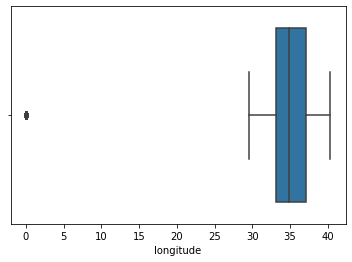

In [15]:
import seaborn as sns
sns.boxplot(x=value.longitude)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

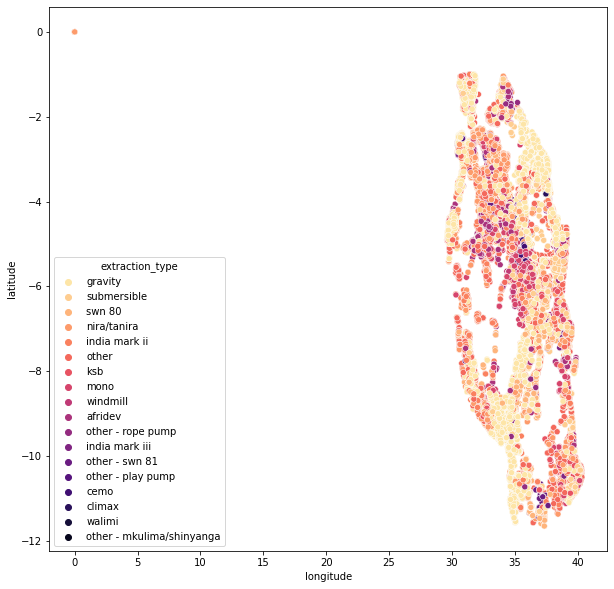

In [20]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='longitude', y='latitude', hue='extraction_type', data=value, palette='magma_r')